In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
print(df.head)
# remove null rows
#df.dropna(inplace=True)
#print(df.isnull().sum())
#print(df.shape)

<bound method NDFrame.head of          PPE      DFA     RPDE  numPulses  numPeriodsPulses  meanPeriodPulses  \
0    0.85247  0.71826  0.57227      240.0             239.0          0.008064   
1    0.76686  0.69481  0.53966      234.0             233.0          0.008258   
2    0.85083  0.67604  0.58982      232.0             231.0          0.008340   
3    0.41121  0.79672  0.59257      178.0             177.0          0.010858   
4    0.32790  0.79782  0.53028      236.0             235.0          0.008162   
..       ...      ...      ...        ...               ...               ...   
751  0.80903  0.56355  0.28385      417.0             416.0          0.004627   
752  0.16084  0.56499  0.59194      415.0             413.0          0.004550   
753  0.88389  0.72335  0.46815      381.0             380.0          0.005069   
754  0.83782  0.74890  0.49823      340.0             339.0          0.005679   
755  0.81304  0.76471  0.46374      340.0             339.0          0.005676  

In [3]:
# preprocessing
print(df.isnull().sum())

PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
numPeriodsPulses             0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 753, dtype: int64


In [4]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
# select best k features

X = df.drop(columns = 'class').values
y = df['class']

SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)

array([[ 2.4874000e+00,  1.6392000e-02, -3.1901752e+03,  5.0000000e-05,
         5.9000000e-05],
       [ 2.8986000e+00,  1.4222000e-02, -3.1064317e+03,  5.1000000e-05,
         1.6900000e-04],
       [ 3.2208000e+00,  3.9709000e-02, -3.0825691e+03,  1.8000000e-05,
         2.1000000e-05],
       ...,
       [-1.1373000e+00,  6.2920000e-03, -2.0225234e+03,  1.6830000e-03,
         1.0128000e-02],
       [-1.7925000e-01,  1.0716000e-02, -2.0205983e+03,  8.2600000e-04,
         5.4840000e-03],
       [ 7.1315000e-01,  8.1830000e-03, -2.0394590e+03,  7.1300000e-04,
         4.6570000e-03]])

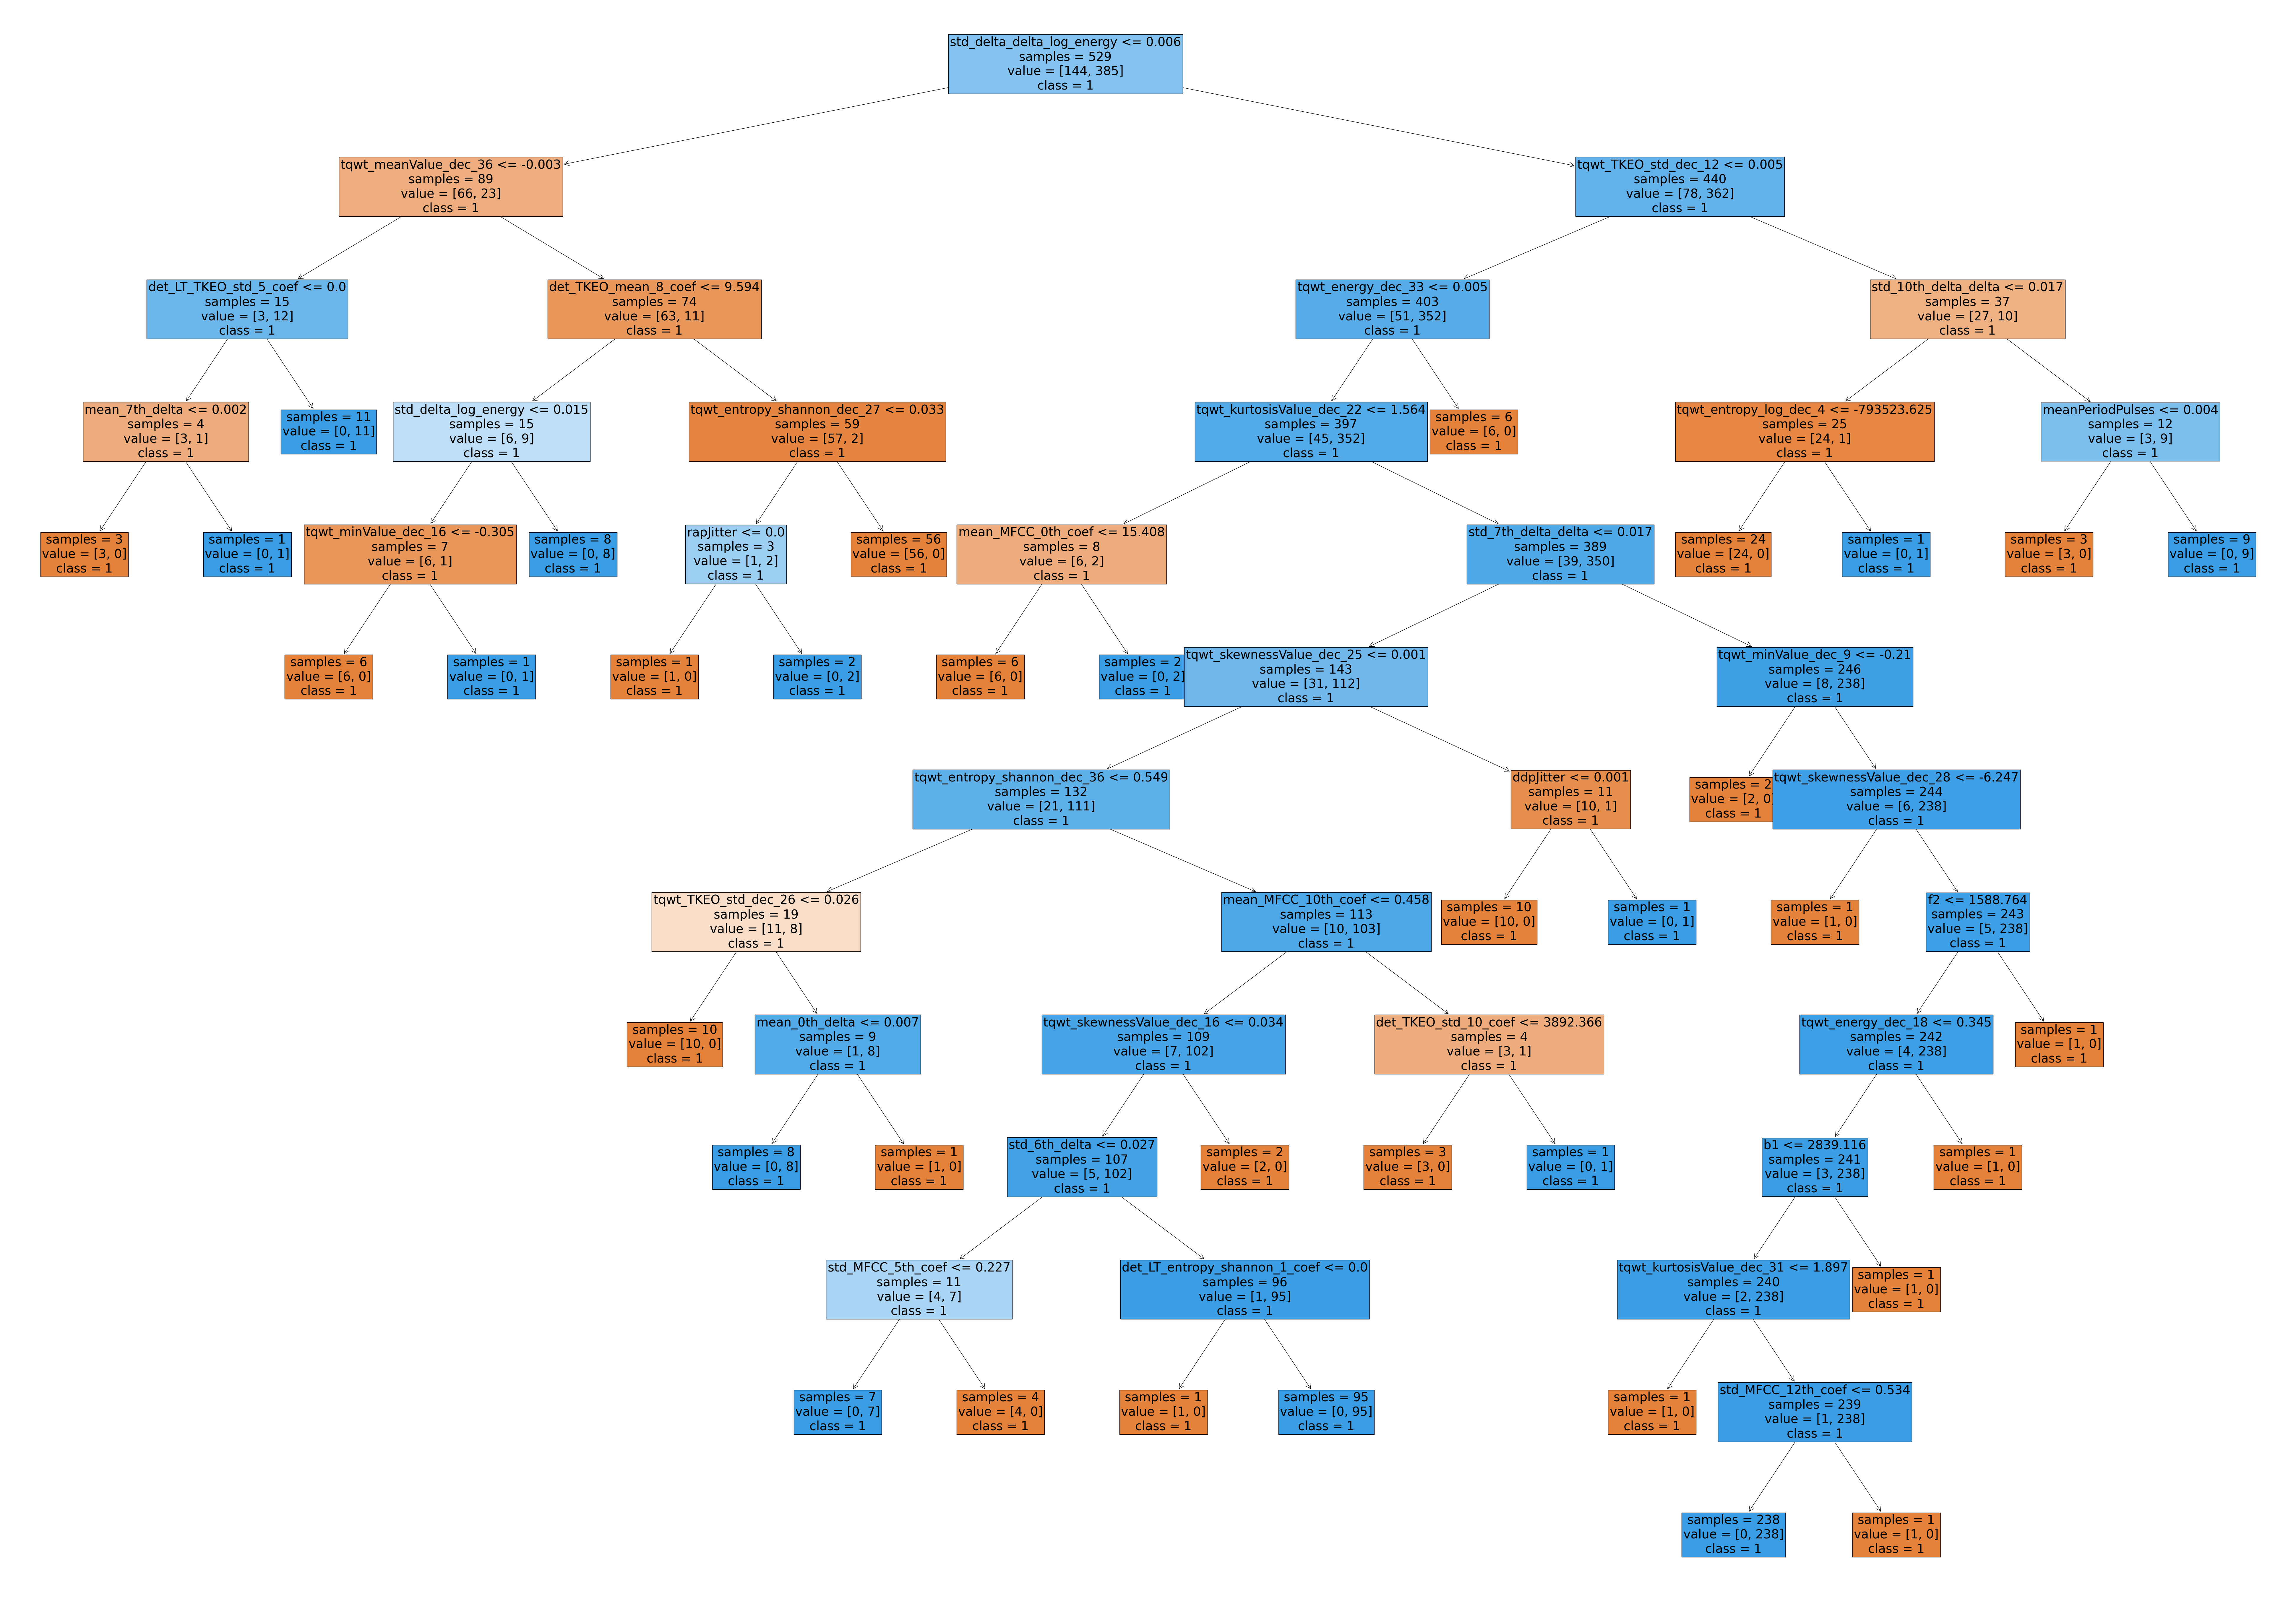

In [26]:
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split


# X_train -> y_train
# X_test -> y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# learn classifier
predictor = tree.DecisionTreeClassifier()
predictor.fit(X_train, y_train)

# plot classifier TODO get feature names
figure = plt.figure(figsize=(100, 70))
tree.plot_tree(predictor, feature_names=df.columns, class_names=df['class'], impurity=False, filled = True, fontsize=30)
plt.show()


In [37]:
# test classifier
y_pred = predictor.predict(X_test)
#print(y_pred.__len__(), y_test.__len__(), y_train.__len__())
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2) * 100, '%')

y_pred = predictor.predict(X_train)
print("accuracy on training set:",  round(metrics.accuracy_score(y_train, y_pred),2) * 100, '%')



accuracy on testing set: 78.0 %
accuracy on training set: 100.0 %


In [40]:
# now while changing kbest features
k = [5,10,40,100,250,700]
for i in k:
    SelectKBest(mutual_info_classif, k=i).fit_transform(X, y)

    # X_train -> y_train
    # X_test -> y_test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

    # learn classifier
    predictor = tree.DecisionTreeClassifier(max_depth=10000)
    predictor.fit(X_train, y_train)

    # test classifier
    y_pred = predictor.predict(X_test)
    print('nº of features:', i)
    print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2) * 100, '%')

    y_pred = predictor.predict(X_train)
    print("accuracy on training set:",  round(metrics.accuracy_score(y_train, y_pred),2) * 100, '%')
    print('------------')
    

nº of features: 5
accuracy on testing set: 75.0 %
accuracy on training set: 100.0 %
------------
nº of features: 10
accuracy on testing set: 79.0 %
accuracy on training set: 100.0 %
------------
nº of features: 40
accuracy on testing set: 78.0 %
accuracy on training set: 100.0 %
------------
nº of features: 100
accuracy on testing set: 79.0 %
accuracy on training set: 100.0 %
------------
nº of features: 250
accuracy on testing set: 74.0 %
accuracy on training set: 100.0 %
------------
nº of features: 700
accuracy on testing set: 76.0 %
accuracy on training set: 100.0 %
------------
